In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
import csv



In [2]:
metaData = pd.read_csv("ISIC_2019_Training_Metadata.csv",usecols=['image','age_approx','anatom_site_general','gender'])
metaData
#burada metaData dosyasını okudum ve lession_id sütununu sildim

,image,age_approx,anatom_site_general,gender
0,ISIC_0000000,55.0,anterior torso,female
1,ISIC_0000001,30.0,anterior torso,female
2,ISIC_0000002,60.0,upper extremity,female
3,ISIC_0000003,30.0,upper extremity,male
4,ISIC_0000004,80.0,posterior torso,male
...,...,...,...,...
25326,ISIC_0073247,85.0,head/neck,female
25327,ISIC_0073248,65.0,anterior torso,male
25328,ISIC_0073249,70.0,lower extremity,male
25329,ISIC_0073251,55.0,palms/soles,female


In [3]:
metaData.shape 

(25331, 4)

In [4]:
metaData=metaData.dropna()#metaData dosyasındaki NaN ları sildim
metaData.isnull().sum()

image                  0
age_approx             0
anatom_site_general    0
gender                 0
dtype: int64

In [5]:
groundData =pd.read_csv("ISIC_2019_Training_GroundTruth.csv")
groundData.head()
#groudData csv dosyasını okudum

,image,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK
0,ISIC_0000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0000001,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0000002,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ISIC_0000003,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ISIC_0000004,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
combineData=pd.merge(metaData,groundData, on='image')
#metaData ve grounData csv dosyalarını birleştirdim
hastaData = pd.DataFrame([x for x in np.where(groundData == 1,
                                              groundData.columns,'').flatten().tolist()
                                               if len(x) > 0], columns = (['hastaOlan']))
hastaData=pd.concat([metaData,hastaData], axis = 1, join='inner')
#groundData daki lezyon türlerini hastaOlan sınıfına atadım
hastaData


,image,age_approx,anatom_site_general,gender,hastaOlan
0,ISIC_0000000,55.0,anterior torso,female,NV
1,ISIC_0000001,30.0,anterior torso,female,NV
2,ISIC_0000002,60.0,upper extremity,female,MEL
3,ISIC_0000003,30.0,upper extremity,male,NV
4,ISIC_0000004,80.0,posterior torso,male,MEL
...,...,...,...,...,...
25326,ISIC_0073247,85.0,head/neck,female,BCC
25327,ISIC_0073248,65.0,anterior torso,male,BKL
25328,ISIC_0073249,70.0,lower extremity,male,MEL
25329,ISIC_0073251,55.0,palms/soles,female,NV


In [7]:
%matplotlib inline

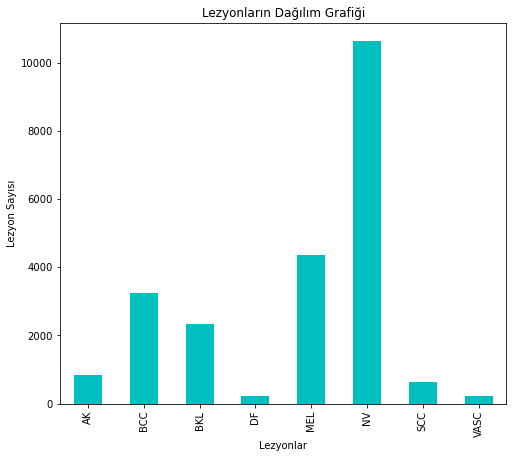

In [8]:
lezyonPlot=hastaData['hastaOlan'].value_counts().sort_index().plot(kind='bar', figsize=(8,7),color='c' )
#lezyon türlerinin plot ile grafiğini oluşturdum
#value_counts ile verileri saydırdım
#sort_index ile sıraladım
#fig_size ile grafiğimin boyutunu ayarladım
#color ile de renklendirdim
lezyonPlot.set_xlabel('Lezyonlar')#x eksenine isim verdim
lezyonPlot.set_ylabel('Lezyon Sayısı')#y eksenine isim verdim
lezyonPlot.set_title('Lezyonların Dağılım Grafiği')#grafiğime başlık ekledim
matplotlib.style.use('ggplot')#çizgi grafiği oluşturdum
plt.style.use(['dark_background'])#arkaplanı siyah yaptım
plt.show()

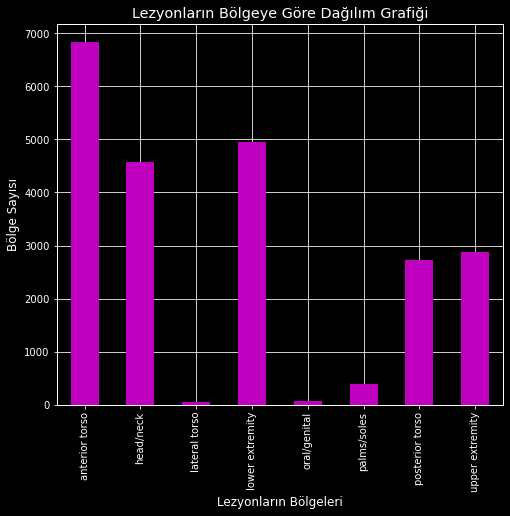

In [9]:
bolgePlot=hastaData['anatom_site_general'].value_counts().sort_index().plot(kind='bar', figsize=(8,7),color='m' )
bolgePlot.set_xlabel('Lezyonların Bölgeleri')
bolgePlot.set_ylabel('Bölge Sayısı')
bolgePlot.set_title('Lezyonların Bölgeye Göre Dağılım Grafiği')
matplotlib.style.use('ggplot')
plt.style.use(['dark_background'])
plt.show()

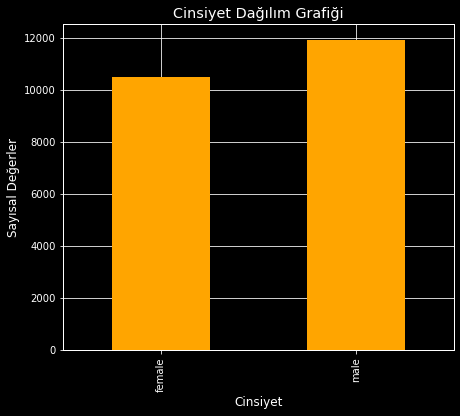

In [10]:
cinsiyetPlot=hastaData['gender'].value_counts().sort_index().plot(kind='bar', figsize=(7,6),color='orange' )
cinsiyetPlot.set_xlabel('Cinsiyet')
cinsiyetPlot.set_ylabel('Sayısal Değerler')
cinsiyetPlot.set_title('Cinsiyet Dağılım Grafiği')
matplotlib.style.use('ggplot')
plt.style.use(['dark_background'])
plt.show()

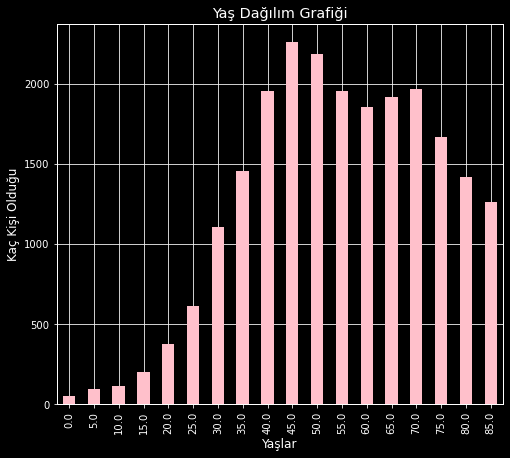

In [11]:
yasPlot=hastaData['age_approx'].value_counts().sort_index().plot(kind='bar', figsize=(8,7),color='pink' )
yasPlot.set_xlabel('Yaşlar')
yasPlot.set_ylabel('Kaç Kişi Olduğu')
yasPlot.set_title('Yaş Dağılım Grafiği')
matplotlib.style.use('ggplot')
plt.style.use(['dark_background'])
plt.show()

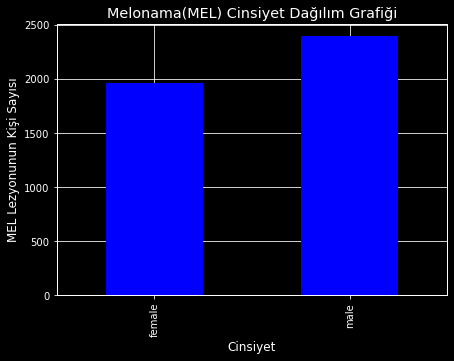

In [12]:
cinsMEL=hastaData[hastaData.hastaOlan =='MEL']['gender'].value_counts().sort_index().plot(kind='bar',
                                                                figsize=(7,5),color='blue')
cinsMEL.set_xlabel('Cinsiyet')
cinsMEL.set_ylabel('MEL Lezyonunun Kişi Sayısı')
cinsMEL.set_title('Melonama(MEL) Cinsiyet Dağılım Grafiği')
matplotlib.style.use('ggplot')
plt.style.use(['dark_background'])
plt.show()


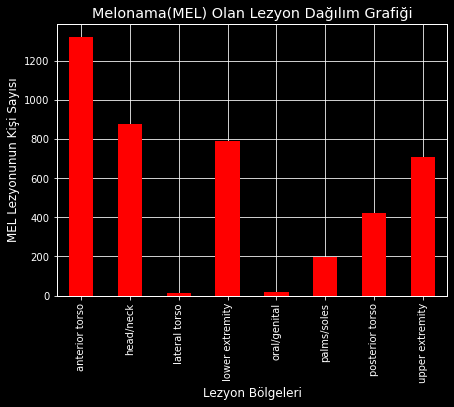

In [13]:
bolgeMEL=hastaData[hastaData.hastaOlan =='MEL']['anatom_site_general'].value_counts().sort_index().plot(kind='bar',
                                                                figsize=(7,5),color='r')
bolgeMEL.set_xlabel('Lezyon Bölgeleri')
bolgeMEL.set_ylabel('MEL Lezyonunun Kişi Sayısı')
bolgeMEL.set_title('Melonama(MEL) Olan Lezyon Dağılım Grafiği')
matplotlib.style.use('ggplot')
plt.style.use(['dark_background'])
plt.show()

In [14]:
#Verideki kategorik değerleri nümerik hale getirdim
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
hastaData["hastaOlan"]=le.fit_transform(hastaData["hastaOlan"])
hastaData

,image,age_approx,anatom_site_general,gender,hastaOlan
0,ISIC_0000000,55.0,anterior torso,female,5
1,ISIC_0000001,30.0,anterior torso,female,5
2,ISIC_0000002,60.0,upper extremity,female,4
3,ISIC_0000003,30.0,upper extremity,male,5
4,ISIC_0000004,80.0,posterior torso,male,4
...,...,...,...,...,...
25326,ISIC_0073247,85.0,head/neck,female,1
25327,ISIC_0073248,65.0,anterior torso,male,2
25328,ISIC_0073249,70.0,lower extremity,male,4
25329,ISIC_0073251,55.0,palms/soles,female,5


In [18]:

from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()
# butun kolonlardaki unique degerleri gosterir
dtype_object=hastaData.select_dtypes(include=['object'])
dtype_object.head()
for x in dtype_object.columns:
    hastaData[x]=le.fit_transform(hastaData[x])
hastaData

,image,age_approx,anatom_site_general,gender,hastaOlan
0,0,55.0,0,0,5
1,1,30.0,0,0,5
2,2,60.0,7,0,4
3,3,30.0,7,1,5
4,4,80.0,6,1,4
...,...,...,...,...,...
25326,22475,85.0,1,0,1
25327,22476,65.0,0,1,2
25328,22477,70.0,3,1,4
25329,22478,55.0,5,0,5


In [19]:
#Veriyi %80 train %20 test olacak şekilde böldüm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
x = hastaData.iloc[:,0:5].values#iloc konum odaklı indexleme
y = hastaData['hastaOlan'].values
cnt=5
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = cnt)
len(x_train)

17984

In [20]:
len(x_test)

4496

In [21]:
#veriyi Ölçeklendirdim
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


Accuracy: 0.9966637010676157
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       170
           1       1.00      1.00      1.00       632
           2       1.00      1.00      1.00       474
           3       1.00      0.90      0.95        42
           4       1.00      1.00      1.00       869
           5       1.00      1.00      1.00      2142
           6       0.98      0.98      0.98       125
           7       1.00      0.93      0.96        42

    accuracy                           1.00      4496
   macro avg       1.00      0.97      0.98      4496
weighted avg       1.00      1.00      1.00      4496

[[ 169    1    0    0    0    0    0    0]
 [   0  631    1    0    0    0    0    0]
 [   0    0  474    0    0    0    0    0]
 [   0    0    1   38    3    0    0    0]
 [   0    0    0    0  866    3    0    0]
 [   0    0    0    0    0 2142    0    0]
 [   0    0    0    0    0    3  122    0]
 [   0    0    0   

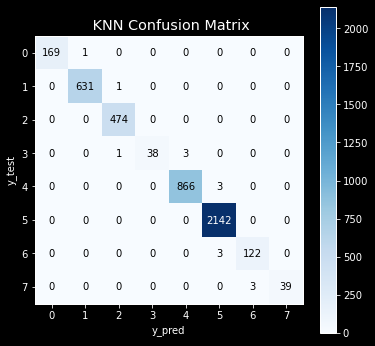

In [22]:
#K-NN ile veriyi sınıflandırdım
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import sklearn.metrics as metrics
import scikitplot as skplt
classifier = KNeighborsClassifier(n_neighbors=3)#iris veri kümesinde 3 tane class olduğu için 
classifier.fit(x_train, y_train)
#test ettim,doğruluk oranı
y_pred = classifier.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
cm=classification_report(y_test, y_pred)
print(cm)
print(confusion_matrix(y_test, y_pred))
skplt.metrics.plot_confusion_matrix(
    y_test, 
    y_pred,
    figsize=(6,6))
plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.title(" KNN Confusion Matrix")
plt.show()

Accuracy: 1.0
[[ 170    0    0    0    0    0    0    0]
 [   0  632    0    0    0    0    0    0]
 [   0    0  474    0    0    0    0    0]
 [   0    0    0   42    0    0    0    0]
 [   0    0    0    0  869    0    0    0]
 [   0    0    0    0    0 2142    0    0]
 [   0    0    0    0    0    0  125    0]
 [   0    0    0    0    0    0    0   42]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       170
           1       1.00      1.00      1.00       632
           2       1.00      1.00      1.00       474
           3       1.00      1.00      1.00        42
           4       1.00      1.00      1.00       869
           5       1.00      1.00      1.00      2142
           6       1.00      1.00      1.00       125
           7       1.00      1.00      1.00        42

    accuracy                           1.00      4496
   macro avg       1.00      1.00      1.00      4496
weighted avg       1.00      1.00      1.00  

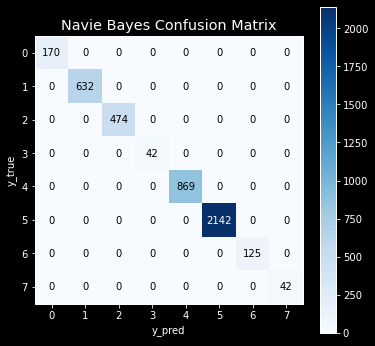

In [23]:
#Navie Bayes ile veriyi sınıflandırdım
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import sklearn.metrics as metrics
import scikitplot as skplt
nb=GaussianNB()
#Training
nb.fit(x_train,y_train)
#test ettim,doğruluk oranı
y_pred = nb.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
skplt.metrics.plot_confusion_matrix(
    y_test, 
    y_pred,
    figsize=(6,6))
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Navie Bayes Confusion Matrix")
plt.show()

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       170
           1       1.00      1.00      1.00       632
           2       1.00      1.00      1.00       474
           3       1.00      1.00      1.00        42
           4       1.00      1.00      1.00       869
           5       1.00      1.00      1.00      2142
           6       1.00      1.00      1.00       125
           7       1.00      1.00      1.00        42

    accuracy                           1.00      4496
   macro avg       1.00      1.00      1.00      4496
weighted avg       1.00      1.00      1.00      4496

[[ 170    0    0    0    0    0    0    0]
 [   0  632    0    0    0    0    0    0]
 [   0    0  474    0    0    0    0    0]
 [   0    0    0   42    0    0    0    0]
 [   0    0    0    0  869    0    0    0]
 [   0    0    0    0    0 2142    0    0]
 [   0    0    0    0    0    0  125    0]
 [   0    0    0    0    0    0   

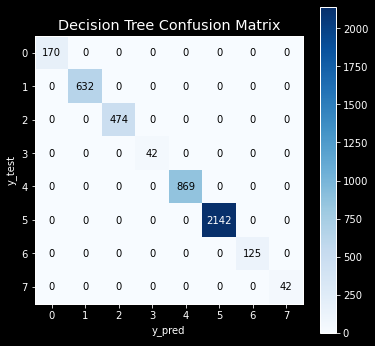

In [24]:
#Karar ağaçları ile veriyi sınıflandırma
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
#dt parametresini fit ile eğitim verilerine algoritmayı eğitmek için çağrılır
#test ettim,doğruluk oranı
y_pred = dt.predict(x_test)
print("Accuracy:",accuracy_score(y_test, y_pred))
cm=classification_report(y_test, y_pred)
print(cm)
print(confusion_matrix(y_test, y_pred))
skplt.metrics.plot_confusion_matrix(
    y_test, 
    y_pred,
    figsize=(6,6))
plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.title("Decision Tree Confusion Matrix")
plt.show()

c:\python\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of logistic regression classifier on test set: 0.99
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       170
           1       1.00      1.00      1.00       632
           2       0.99      1.00      0.99       474
           3       1.00      0.10      0.17        42
           4       0.96      1.00      0.98       869
           5       1.00      1.00      1.00      2142
           6       0.90      0.92      0.91       125
           7       1.00      0.69      0.82        42

    accuracy                           0.99      4496
   macro avg       0.98      0.84      0.86      4496
weighted avg       0.99      0.99      0.98      4496

[[ 170    0    0    0    0    0    0    0]
 [   0  632    0    0    0    0    0    0]
 [   0    0  474    0    0    0    0    0]
 [   0    0    6    4   32    0    0    0]
 [   0    0    0    0  869    0    0    0]
 [   0    0    0    0    0 2142    0    0]
 [   0    0    0    0    0   1

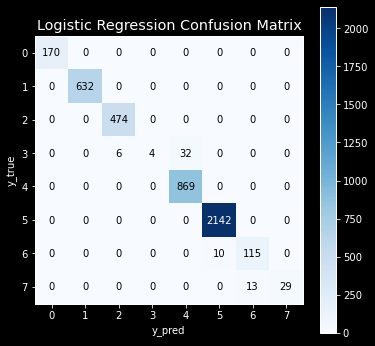

In [56]:
#Logistic Regression ile veriyi sınıflandırdım
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='lbfgs')
logreg.fit(x_train,y_train)
y_pred = logreg.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))
cm=classification_report(y_test, y_pred)
print(cm)
print(confusion_matrix(y_test, y_pred))
skplt.metrics.plot_confusion_matrix(
    y_test, 
    y_pred,
    figsize=(6,6))
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Logistic Regression Confusion Matrix")
plt.show()


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       170
           1       1.00      1.00      1.00       632
           2       1.00      1.00      1.00       474
           3       1.00      1.00      1.00        42
           4       1.00      1.00      1.00       869
           5       1.00      1.00      1.00      2142
           6       1.00      1.00      1.00       125
           7       1.00      1.00      1.00        42

    accuracy                           1.00      4496
   macro avg       1.00      1.00      1.00      4496
weighted avg       1.00      1.00      1.00      4496

[[ 170    0    0    0    0    0    0    0]
 [   0  632    0    0    0    0    0    0]
 [   0    0  474    0    0    0    0    0]
 [   0    0    0   42    0    0    0    0]
 [   0    0    0    0  869    0    0    0]
 [   0    0    0    0    0 2142    0    0]
 [   0    0    0    0    0    0  125    0]
 [   0    0    0    0    0    0   

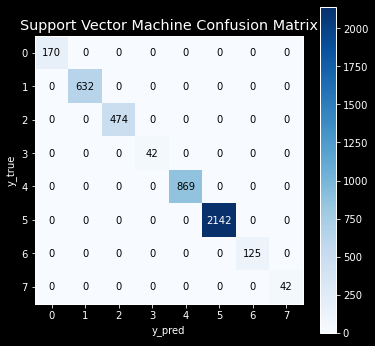

In [57]:
#SVM ile veriyi sınıflandırdım
from sklearn.svm import SVC
svm=SVC(kernel='linear')
svm.fit(x_train,y_train)
y_pred = svm.predict(x_test)
print("Accuracy:",(accuracy_score(y_test, y_pred)))
cm=classification_report(y_test, y_pred)
print(cm)
print(confusion_matrix(y_test, y_pred))
skplt.metrics.plot_confusion_matrix(
    y_test, 
    y_pred,
    figsize=(6,6))
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Support Vector Machine Confusion Matrix")
plt.show()

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       170
           1       1.00      1.00      1.00       632
           2       1.00      1.00      1.00       474
           3       1.00      1.00      1.00        42
           4       1.00      1.00      1.00       869
           5       1.00      1.00      1.00      2142
           6       1.00      1.00      1.00       125
           7       1.00      1.00      1.00        42

    accuracy                           1.00      4496
   macro avg       1.00      1.00      1.00      4496
weighted avg       1.00      1.00      1.00      4496

[[ 170    0    0    0    0    0    0    0]
 [   0  632    0    0    0    0    0    0]
 [   0    0  474    0    0    0    0    0]
 [   0    0    0   42    0    0    0    0]
 [   0    0    0    0  869    0    0    0]
 [   0    0    0    0    0 2142    0    0]
 [   0    0    0    0    0    0  125    0]
 [   0    0    0    0    0    0   

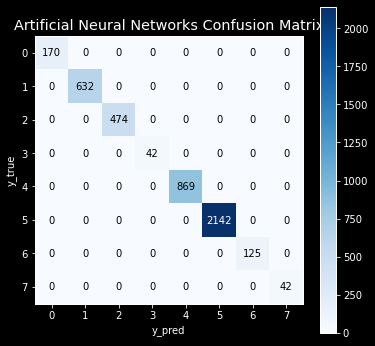

In [59]:
#burada,Yapay sinir ağlarını eğittim
from sklearn.neural_network import MLPClassifier
#hidden_layer_size ile gizli katmanların boyutunu ayarladık
mlp = MLPClassifier(hidden_layer_sizes=(8), learning_rate_init=0.01, max_iter=100)
mlp.fit(x_train, y_train)
predictions = mlp.predict(x_test)
print("Accuracy:",accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
skplt.metrics.plot_confusion_matrix(
    y_test, 
    y_pred,
    figsize=(6,6))
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Artificial Neural Networks Confusion Matrix")
plt.show()